# Linear Regression - Multiple Variables

Home Prices in MONROE Township, NJ (USA)
Given the home prices, find out price of a home that has

1. 3000sft area, 3 bedrooms, 40 years old
2. 2500sft area, 4 bedrooms, 5 years old

Topics
Data Processing: Handling NA variables
Linear Regression using Multiple Variables

In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [15]:
df = pd.read_csv("homeprices_multivariables.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [16]:
#calculate the median of bedrooms
df.bedrooms.median()


3.5

In [17]:
# we need to take median as integer
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

3

In [18]:
#Now i want to fill NA values with this median number
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


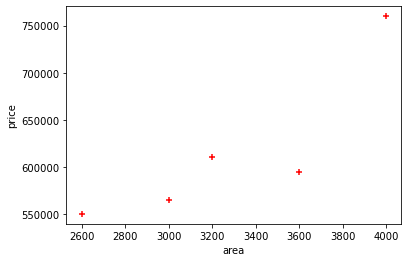

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

# Train the Model

Home prices can be presented as following equation,

home price = (m1  *  area)+ (m2  *  bedrooms) + (m3 * age) + b

In [20]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)  #we use fit model to train the set

LinearRegression()

In [21]:
#once the model is ready, we check for coeff
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [22]:
#check for intercept
reg.intercept_

383724.9999999998

# Test the Model

In [23]:
reg.predict([[3000,3,40]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [24]:
reg.predict([[2500,4,5]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [25]:
(137.25*3000)+(-26025*3)+(-6825*40)+383724.9999999998

444399.9999999998